A. Upload do arquivo e leitura

In [ ]:
import pandas as pd

df = pd.read_csv('massa_dados_5000.txt', sep=';', header=None,
                 names=['data', 'umidade', 'temperatura', 'potenciometro', 'sensor_gas_analogico', 'sensor_gas_digital', 'alarme'])
df['data'] = pd.to_datetime(df['data'])
df.head()


,data,umidade,temperatura,potenciometro,sensor_gas_analogico,sensor_gas_digital,alarme
0,2024-03-22,32.04,33.63,499,843,0,1
1,2024-03-23,35.45,32.81,464,843,0,0
2,2024-12-31,49.17,38.58,584,843,1,1
3,2022-01-18,47.11,26.75,407,843,0,0
4,2021-07-07,42.22,48.46,548,843,0,0


B. Análise descritiva: Quantas vezes o alarme tocou?

In [ ]:
print(df['alarme'].value_counts())


alarme
0    2518
1    2482
Name: count, dtype: int64


C. Gráfico de linha dos sensores ao longo do tempo, destacando alarmes

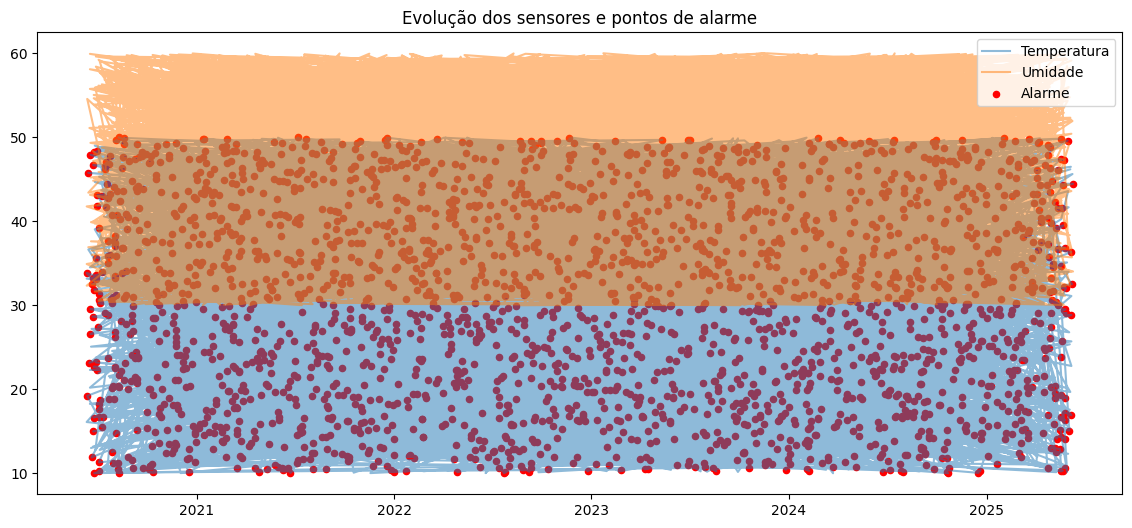

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(df['data'], df['temperatura'], label='Temperatura', alpha=0.5)
plt.plot(df['data'], df['umidade'], label='Umidade', alpha=0.5)
plt.scatter(df[df['alarme']==1]['data'], df[df['alarme']==1]['temperatura'], color='red', label='Alarme', s=20)
plt.title('Evolução dos sensores e pontos de alarme')
plt.legend()
plt.show()


D. Distribuição dos sensores quando o alarme toca vs. não toca
python
Copiar


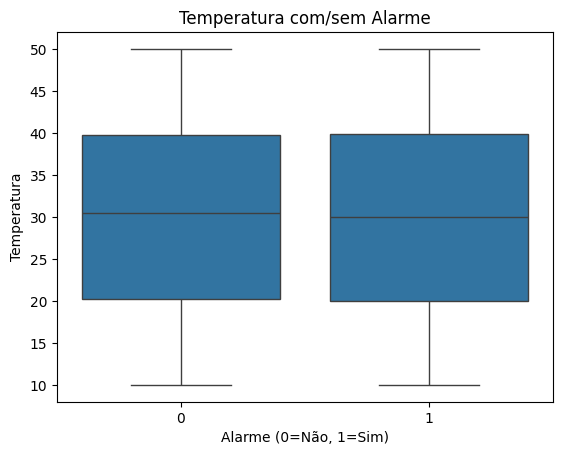

In [ ]:
import seaborn as sns

# Boxplot para comparar temperatura quando alarme toca vs não toca
sns.boxplot(x='alarme', y='temperatura', data=df)
plt.title('Temperatura com/sem Alarme')
plt.xlabel('Alarme (0=Não, 1=Sim)')
plt.ylabel('Temperatura')
plt.show()



E. Dispersão entre sensores, colorindo por alarme

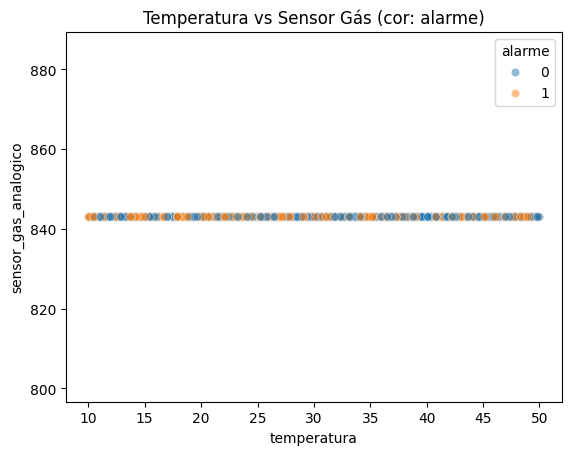

In [ ]:
sns.scatterplot(x='temperatura', y='sensor_gas_analogico', hue='alarme', data=df, alpha=0.5)
plt.title('Temperatura vs Sensor Gás (cor: alarme)')
plt.show()


F. Correlação entre sensores e alarme

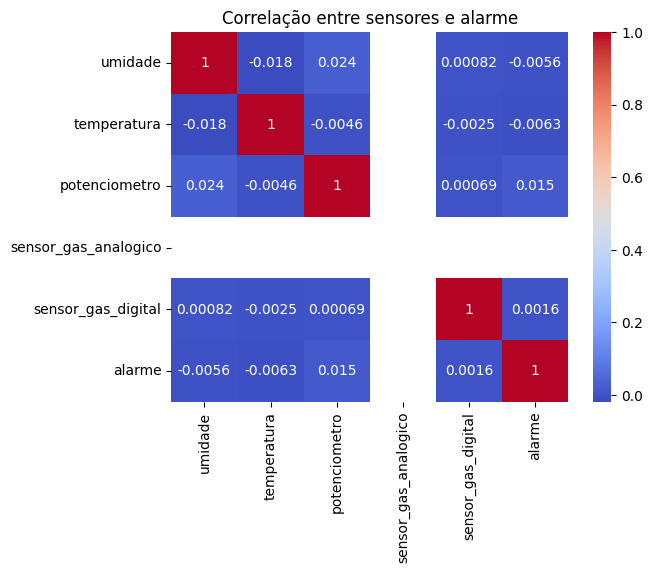

In [ ]:
corr = df[['umidade','temperatura','potenciometro','sensor_gas_analogico','sensor_gas_digital','alarme']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlação entre sensores e alarme')
plt.show()



6. (Bônus) Predição com Machine Learning Simples

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = df[['umidade','temperatura','potenciometro','sensor_gas_analogico','sensor_gas_digital']]
y = df['alarme']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.52      0.52      0.52       763
           1       0.50      0.49      0.50       737

    accuracy                           0.51      1500
   macro avg       0.51      0.51      0.51      1500
weighted avg       0.51      0.51      0.51      1500

